In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()
print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

#### Entender el dataset
información del dataset:

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Caracteristicas del dataset:

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Cantidad de datos:

In [5]:
print(boston.data.shape)

(506, 13)


#### Verificar información de las columnas
Nombre de las columnas:

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Preparar la regresión lineal simple
##### Nota:
Solamente se necesita 1 variable independiente, por eso es
#### Regresión Lineal Simple
X es nuestra variable independiente.

In [7]:
# Seleccionamos el numero de la columna RM, la cual es el promedio de habitaciones por vivienda
X = boston.data[:,np.newaxis,5]

####  Seleccionamos los datos correspondientes a nuestras etiquetas 
Los almacenamos en Y, nuestra variable dependiente es decir:
##### el valor medio de las viviendas

In [8]:
y=boston.target

#### Graficamos los datos

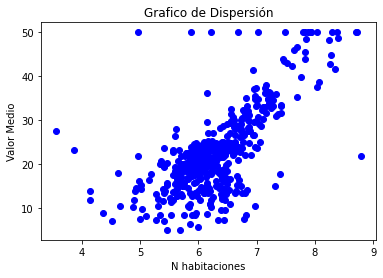

In [9]:
#Configurar Gráfico:
plt.scatter(X,y, label="Relacion Habitación Precio",color="blue")
#Definir título y nombres de ejes
plt.title("Grafico de Dispersión")
plt.ylabel("Valor Medio")
plt.xlabel("N habitaciones")
#Mostrar leyenda y figura
#plt.legend()
plt.show()


#### Implementacion Regresión Lineal Simple

In [10]:
from sklearn.model_selection import train_test_split
# Separar los datos de "train" en entrenamineto y prueba 
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)
#Escoger el modelo
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train,Y_train)
#Realizo una prediccion
Y_pred = lr.predict(X_test)

In [11]:
print(Y_pred.shape)

(102,)


In [12]:

print(boston.target.shape)
print(boston.target.dtype)
num=boston.target.shape
print(str(506*0.2))

(506,)
float64
101.2


#### Predicción vs Datos reales

#### Predicción

In [13]:
print(Y_pred)
print("\n")
print(Y_pred.shape)


[22.76626986 19.87128079 25.57326535 17.24027249 29.77935889 18.19060325
 17.91782312 21.89513333 26.62918841 23.70780126 23.38222499 16.63311672
 13.91411483 28.66184031 15.35720969 22.02712372 22.98625384 27.30673905
 26.54119482 36.95963574 21.48156347 14.26608919 20.11766284 24.35015446
 22.78386858 26.63798777 26.43560252 18.60417311 23.05664871 18.12020838
 17.33706543 10.91353345 34.20543641 23.7429987  34.91818448 36.34368061
 21.03279616 30.02574094 21.63995193 10.18318667 17.13468018 23.57581088
 19.73929041 21.10319104 26.74358008 23.83099229 24.29735831 18.94734811
 21.55195834 39.97781583 24.55253972 25.01010638 16.5099257  24.79012241
 33.41349411 22.84546409 19.38731605 11.40629755 22.78386858 23.70780126
 21.73674487 33.14071398 23.31183011 20.20565643 20.16165964 41.1393312
 28.61784352 23.35582691 22.55508525 19.47530964  3.65406238 26.44440188
 23.87498908 20.21445579 24.03337754 22.16791346 16.49232698 32.46316335
 21.90393269 19.05294042 30.1401326  26.44440188 22.

#### Datos Reales

In [14]:
print(Y_test)
print("\n")
print(Y_test.shape)

[20.7 24.3 13.4 19.3 30.3 20.3 19.9 24.7 13.4 22.6  9.5 15.7 10.4 37.2
 15.6 20.5 18.1 33.1 30.5 50.  21.7 20.  21.7 22.9 23.  23.7 28.  10.2
  7.2 19.8 16.2 21.9 42.3 21.6 35.2 48.5 21.  32.9 25.  10.2 23.1 22.3
 24.7 22.2 25.  24.6 16.7 20.9 27.1 44.8 20.2 24.8 13.9 16.5 43.1 23.8
 24.5 14.4 21.2 24.2 13.8 50.  23.  21.2 17.5 48.8 34.9 15.  21.4 13.5
 11.9 30.1 14.3 23.2 17.1 23.  15.4 31.7 17.8 23.3 37.3 14.9 21.2  8.5
 15.2 25.2 19.4 11.7 13.8 23.1 35.4 19.1 24.  27.1 23.9 28.7 11.5 13.
 14.9 33.2 22.2 22. ]


(102,)


### Graficamos datos de prueba vs predicción

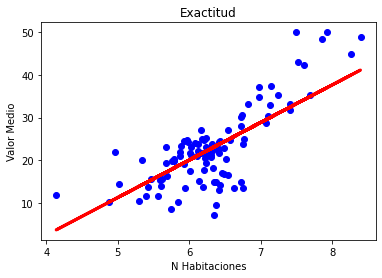

In [18]:
plt.scatter(X_test,Y_test, color="blue")
plt.plot(X_test,Y_pred,color="red",linewidth=3)
plt.title("Exactitud")
plt.ylabel("Valor Medio")
plt.xlabel("N Habitaciones")
plt.show()

#### NOTA: 
Los datos estan demasiado dispersos, la regresión lineal simple no es el mejor algoritmo para este problema

## Calcular la ecuación de la recta:
#### Y=ax+b
Valor de la pendiente o coeficiente de "a"

In [19]:
print(lr.coef_)

[8.79935888]


Valor de la intersección o coeficiente "b":

In [20]:
print(lr.intercept_)

-32.75768466585959


### La respuesta a la ecuación es la siguiente:


In [26]:
print("a=",str(lr.coef_),"b=",str(lr.intercept_))
print("Y=",lr.coef_,"X +",lr.intercept_)

a= [8.79935888] b= -32.75768466585959
Y= [8.79935888] X + -32.75768466585959


### Exactitud del algoritmo

In [30]:
print(lr.score(X_test,Y_test))

0.5992151101021822
